In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
import pandas_datareader as reader
from datetime import datetime as dt

In [3]:
# Company
company = ['AMZN']

# Specifying a timeline
end_time = dt.today()
start_time = dt(end_time.year - 5, end_time.month, end_time.day)  # A year ago

# Data extraction from Yahoo Finance
AMZN = reader.get_data_yahoo(company, start = start_time, end = end_time) 
AMZN

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,
2016-01-07,607.940002,607.940002,630.000000,605.210022,621.799988,7074900
2016-01-08,607.049988,607.049988,624.140015,606.000000,619.659973,5512900
2016-01-11,617.739990,617.739990,619.849976,598.570007,612.479980,4891600
2016-01-12,617.890015,617.890015,625.989990,612.239990,625.250000,4724100
2016-01-13,581.809998,581.809998,620.880005,579.159973,620.880005,7655200
...,...,...,...,...,...,...
2020-12-31,3256.929932,3256.929932,3282.919922,3241.199951,3275.000000,2954100
2021-01-04,3186.629883,3186.629883,3272.000000,3144.020020,3270.000000,4411400


In [4]:
# Drop level 1 from multi-level column index
AMZN = AMZN.droplevel(1, axis=1) 
AMZN

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2016-01-07,607.940002,607.940002,630.000000,605.210022,621.799988,7074900
2016-01-08,607.049988,607.049988,624.140015,606.000000,619.659973,5512900
2016-01-11,617.739990,617.739990,619.849976,598.570007,612.479980,4891600
2016-01-12,617.890015,617.890015,625.989990,612.239990,625.250000,4724100
2016-01-13,581.809998,581.809998,620.880005,579.159973,620.880005,7655200
...,...,...,...,...,...,...
2020-12-31,3256.929932,3256.929932,3282.919922,3241.199951,3275.000000,2954100
2021-01-04,3186.629883,3186.629883,3272.000000,3144.020020,3270.000000,4411400
2021-01-05,3218.510010,3218.510010,3223.379883,3165.060059,3166.010010,2655500


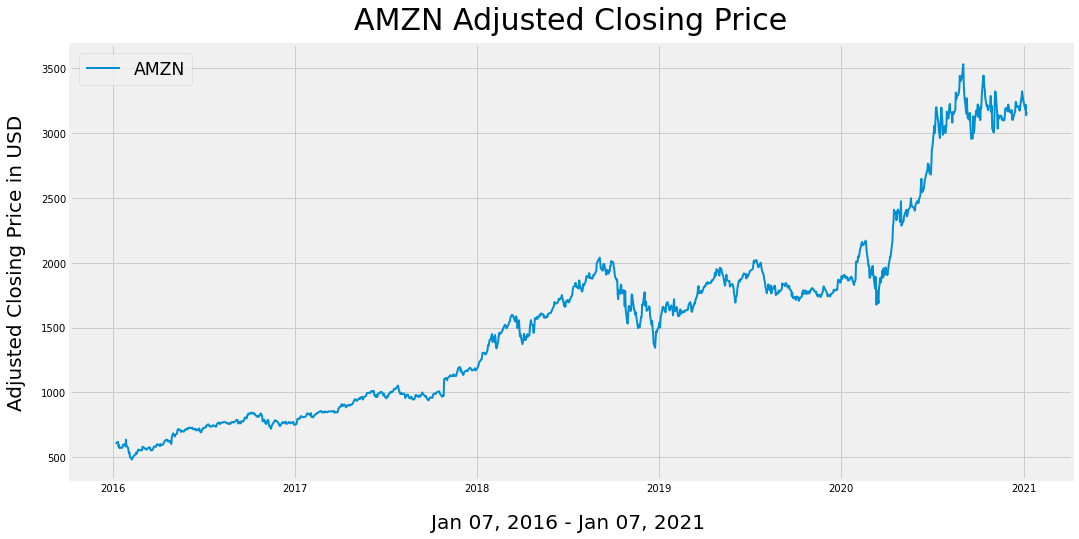

In [5]:
# Plot the Historical Adjusted Closing Price
plt.figure(figsize=(16,8))
plt.plot(AMZN['Adj Close'], label = 'AMZN', linewidth = 2)
plt.xlabel(start_time.strftime('%b %d, %Y ') + '- ' + end_time.strftime('%b %d, %Y '), labelpad=20, fontsize=20)
plt.ylabel('Adjusted Closing Price in USD', labelpad=15, fontsize=20)
plt.title('AMZN Adjusted Closing Price', pad=15, fontsize=30)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize='xx-large')
plt.show()

In [6]:
# Short window Simple Moving Average (SMA)
short_window = 40

short_sma = pd.DataFrame()
short_sma['Adj Close'] = AMZN['Adj Close'].rolling(window = short_window).mean()
short_sma

,Adj Close
Date,
2016-01-07,NaN
2016-01-08,NaN
2016-01-11,NaN
2016-01-12,NaN
2016-01-13,NaN
...,...
2020-12-31,3178.344250
2021-01-04,3176.981000
2021-01-05,3174.393750


In [7]:
# Long window Simple Moving Average (SMA)
long_window = 100

long_sma = pd.DataFrame()
long_sma['Adj Close'] = AMZN['Adj Close'].rolling(window = long_window).mean()
long_sma

,Adj Close
Date,
2016-01-07,NaN
2016-01-08,NaN
2016-01-11,NaN
2016-01-12,NaN
2016-01-13,NaN
...,...
2020-12-31,3198.735593
2021-01-04,3199.795193
2021-01-05,3200.357893


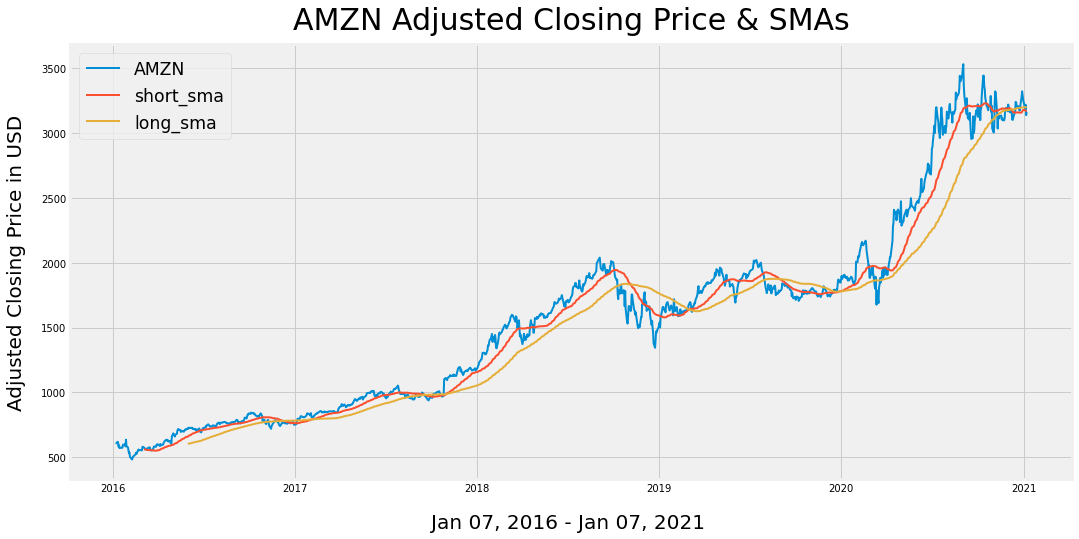

In [8]:
# Plot the Historical Adjusted Closing Price & the SMAs
plt.figure(figsize=(16,8))
plt.plot(AMZN['Adj Close'], label = 'AMZN', linewidth = 2)
plt.plot(short_sma['Adj Close'], label = 'short_sma', linewidth = 2)
plt.plot(long_sma['Adj Close'], label = 'long_sma', linewidth = 2)
plt.xlabel(start_time.strftime('%b %d, %Y ') + '- ' + end_time.strftime('%b %d, %Y '), labelpad=20, fontsize=20)
plt.ylabel('Adjusted Closing Price in USD', labelpad=15, fontsize=20)
plt.title('AMZN Adjusted Closing Price & SMAs', pad=15, fontsize=30)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize='xx-large')
plt.show()

In [9]:
# Store the data
all_data = pd.DataFrame()
all_data['AMZN'] = AMZN['Adj Close']
all_data['short_sma'] = short_sma['Adj Close']
all_data['long_sma'] = long_sma['Adj Close']
all_data

,AMZN,short_sma,long_sma
Date,,,
2016-01-07,607.940002,NaN,NaN
2016-01-08,607.049988,NaN,NaN
2016-01-11,617.739990,NaN,NaN
2016-01-12,617.890015,NaN,NaN
2016-01-13,581.809998,NaN,NaN
...,...,...,...
2020-12-31,3256.929932,3178.344250,3198.735593
2021-01-04,3186.629883,3176.981000,3199.795193
2021-01-05,3218.510010,3174.393750,3200.357893


In [10]:
# The Dual Moving Average Crossover (DMAC) occurs when a short-term average crosses a long-term average
# This signal is used to identify that momentum is shifting in the direction of the short-term average
# A buy signal is generated when the short-term average crosses the long-term average and rises above it, 
# while a sell signal is triggered by a short-term average crossing long-term average and falling below it.

# Function to signal when to buy and when to sell the stock
def DMAC(data) :
    buy_signal = []
    sell_signal = []
    crossing = -1 # When the two SMA crossed past each other
    
    for i in range(len(all_data)) :
        if all_data['short_sma'][i] > all_data['long_sma'][i] :
            if crossing != 1 :
              buy_signal.append(all_data['AMZN'][i])
              sell_signal.append(np.nan)
              crossing = 1
            else :
               buy_signal.append(np.nan)
               sell_signal.append(np.nan)
        elif all_data['short_sma'][i] < all_data['long_sma'][i] :
            if crossing != 0 :
                buy_signal.append(np.nan)
                sell_signal.append(all_data['AMZN'][i])
                crossing = 0
            else :
                buy_signal.append(np.nan)
                sell_signal.append(np.nan)
        else :
                buy_signal.append(np.nan)
                sell_signal.append(np.nan)

    return (buy_signal, sell_signal)

In [11]:
# Store the buy and sell data into a variable
DMAC_tuple = DMAC(all_data)
all_data['buy_signal'] = DMAC_tuple[0]
all_data['sell_signal'] = DMAC_tuple[1]
all_data

,AMZN,short_sma,long_sma,buy_signal,sell_signal
Date,,,,,
2016-01-07,607.940002,NaN,NaN,NaN,NaN
2016-01-08,607.049988,NaN,NaN,NaN,NaN
2016-01-11,617.739990,NaN,NaN,NaN,NaN
2016-01-12,617.890015,NaN,NaN,NaN,NaN
2016-01-13,581.809998,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-12-31,3256.929932,3178.344250,3198.735593,NaN,NaN
2021-01-04,3186.629883,3176.981000,3199.795193,NaN,NaN
2021-01-05,3218.510010,3174.393750,3200.357893,NaN,NaN


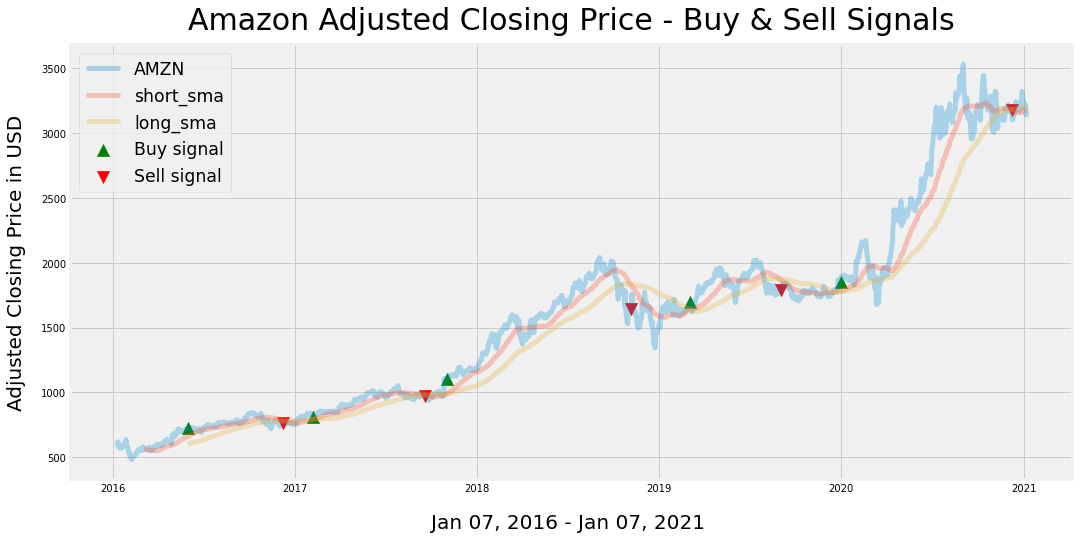

In [12]:
# Plot the Historical Adjusted Closing Price, the SMAs & the strategy that shows buy and sell signals
plt.figure(figsize = (16, 8))
plt.plot(all_data['AMZN'], label = 'AMZN', alpha = 0.3, linewidth = 5)
plt.plot(all_data['short_sma'], label = 'short_sma', alpha = 0.3, linewidth = 5)
plt.plot(all_data['long_sma'], label = 'long_sma', alpha = 0.3, linewidth = 5)
plt.scatter(all_data.index, all_data['buy_signal'], label = 'Buy signal', marker = '^', color = 'green', s = 150)
plt.scatter(all_data.index, all_data['sell_signal'], label = 'Sell signal', marker = 'v', color = 'red', s = 150)
plt.xlabel(start_time.strftime('%b %d, %Y ') + '- ' + end_time.strftime('%b %d, %Y '), labelpad=20, fontsize=20)
plt.ylabel('Adjusted Closing Price in USD', labelpad=15, fontsize=20)
plt.title('Amazon Adjusted Closing Price - Buy & Sell Signals', pad=15, fontsize=30)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize='xx-large')
plt.show()

In [13]:
# Last dates we should have bought & sold the stock
last_signals = all_data.apply(pd.Series.last_valid_index)
last_buy_signal = last_signals['buy_signal']
last_sell_signal = last_signals['sell_signal']
last_buy_signal = last_buy_signal.strftime('%b %d, %Y ')
last_sell_signal = last_sell_signal.strftime('%b %d, %Y ')
print('The last buy signal was on ' + last_buy_signal + 'at ' + str(all_data.loc[last_buy_signal, 'AMZN']) + '\n')
print('The last sell signal was on ' + last_sell_signal + 'at ' + str(all_data.loc[last_sell_signal, 'AMZN']))

The last buy signal was on Dec 31, 2019 at 1847.8399658203125

The last sell signal was on Dec 08, 2020 at 3177.2900390625
